EVIDENCIA DE APRENDIZAJE 2:

MALENIA JURANY CIFUENTES ALVAREZ CC:1123309582 , MARIA JOSÉ TOVAR PATERNINA CC:1005584586

Analítica de Datos (andres felipe callejas) - PREICA2502B010096

**El siguiente escrip cumple con las siguientes funciones:** 

**1. Extracción de datos:** se crea una función que pueda obtener datos en formato dataset desde un URL, usando la palataforma de kaggle.

**2. Enriquecimiento de datos:** Una vez obtenido los datos desde kaggle se enriquecen añadiendo 2 columnas que contgengan información relacionada, esto se guarda en formado .csv denominado "entregable2_enriquecido.csv"

**3. Generación de gráficos:** Se generan gráficos de acuerdo a los datos obtenidos, los gráficos son: gráficos de dispersión, densidad, histograma; estos se entregan en un archivo .jpg denominado "entregable2.jpg"

**1. Extracción de datos**

In [9]:
#importación de librerias 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datagenerator import DataGenerator

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
#instalación de datagenerador 
datagen = DataGenerator()

In [11]:
#descargamos un conjunto de datos de una fuente externa 
df1 = pd.DataFrame()
dataset = datagen.download_dataset_zip("pratyushpuri/financial-news-market-events-dataset-2025") 
csv_dir =datagen.extract_zip_files(dataset)
df1 = datagen.create_csv(csv_dir)

Descargando dataset desde Kaggle...


Ruta al dataset: /home/codespace/.cache/kagglehub/datasets/pratyushpuri/financial-news-market-events-dataset-2025/versions/1
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /home/codespace/.cache/kagglehub/datasets/pratyushpuri/financial-news-market-events-dataset-2025/versions/1/financial_news_events.csv...
Creando/actualizando 
cvs creado correctamente en 


In [12]:
#obtención de datos desde la url de kaggle
def obtener_datos_kaggle(url=""):
        df = pd.DataFrame()
        datagen= DataGenerator()
        dataset = datagen.download_dataset_zip(url) 
        csv_dir =datagen.extract_zip_files(dataset)
        df = datagen.create_csv(csv_dir)
        return df

In [14]:
#se muestran las 2 primera filas del dataframe
df1.head(2)

,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,News_Url
0,2025-05-21,Nikkei 225 index benefits from a weaker yen,Times of India,Commodity Price Shock,DAX,3.52,166.45,NaN,Technology,High,Goldman Sachs,https://timesofindia.indiatimes.com/business/m...
1,2025-05-18,Government subsidy program gives a lift to the...,Financial Times,Central Bank Meeting,Shanghai Composite,-3.39,57.61,NaN,Retail,Low,ExxonMobil,https://timesofindia.indiatimes.com/business/m...


**2. Enriquecimiento de datos**


In [19]:
#Convertir 'Date' a datetime (maneja errores si hay valores inválidos)
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

#Crear Sentiment_Label basado en Index_Change_Percent
df1['Sentiment_Label'] = df1['Index_Change_Percent'].apply(
lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

#Crear Day_of_Week (nombre del día de la semana)
df1['Day_of_Week'] = df1['Date'].dt.day_name()

# Verificar que se crearon correctamente
print("\n Columnas finales:")
print(df1.columns.tolist())
print("\n Ejemplo de nuevas columnas:")
print(df1[['Index_Change_Percent', 'Sentiment_Label', 'Date', 'Day_of_Week']].head())


# GUARDAR ARCHIVO CON LAS 2 COLUMNAS ADICIONALES 
output_file = 'entregable2_enriquecido.csv'
df1.to_csv(output_file, index=False)
print(f"\n¡Archivo guardado como '{output_file}'!")


 Columnas finales:
['Date', 'Headline', 'Source', 'Market_Event', 'Market_Index', 'Index_Change_Percent', 'Trading_Volume', 'Sentiment', 'Sector', 'Impact_Level', 'Related_Company', 'News_Url', 'Sentiment_Label', 'Day_of_Week']

 Ejemplo de nuevas columnas:
   Index_Change_Percent Sentiment_Label       Date Day_of_Week
0                  3.52        Positive 2025-05-21   Wednesday
1                 -3.39        Negative 2025-05-18      Sunday
2                 -0.05        Negative 2025-06-25   Wednesday
3                 -2.29        Negative 2025-07-21      Monday
4                 -3.97        Negative 2025-07-23   Wednesday

¡Archivo guardado como 'entregable2_enriquecido.csv'!


**3. Generación de gráficos**

Columnas disponibles: ['Date', 'Headline', 'Source', 'Market_Event', 'Market_Index', 'Index_Change_Percent', 'Trading_Volume', 'Sentiment', 'Sector', 'Impact_Level', 'Related_Company', 'News_Url', 'Sentiment_Label', 'Day_of_Week']

Primeras filas:
         Date                                           Headline  \
0  2025-05-21        Nikkei 225 index benefits from a weaker yen   
1  2025-05-18  Government subsidy program gives a lift to the...   
2  2025-06-25  New housing data release shows a slowdown in m...   
3  2025-07-21  Massive stock buyback program announced by a c...   
4  2025-07-23  Government spending bill is expected to stimul...   

                    Source                Market_Event        Market_Index  \
0           Times of India       Commodity Price Shock                 DAX   
1          Financial Times        Central Bank Meeting  Shanghai Composite   
2  The Hindu Business Line  Consumer Confidence Report  Shanghai Composite   
3            The Economist     

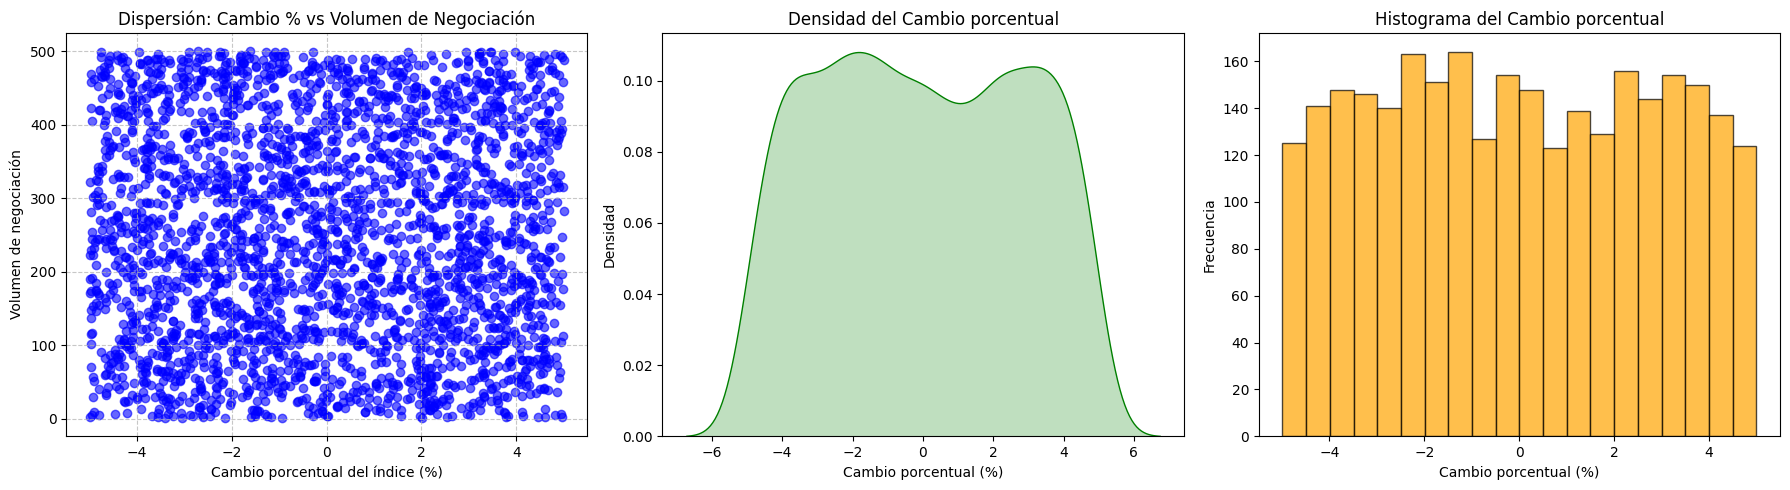

In [22]:
# función para cargar los datos
df = pd.read_csv('entregable2_enriquecido.csv')

# Verificar estructura
print("Columnas disponibles:", df.columns.tolist())
print("\nPrimeras filas:")
print(df.head())

# Convertir 'Index_Change_Percent' a float 
df['Index_Change_Percent'] = pd.to_numeric(df['Index_Change_Percent'], errors='coerce')
df['Trading_Volume'] = pd.to_numeric(df['Trading_Volume'], errors='coerce')

# Eliminar filas con valores nulos en Index_Change_Percent
df = df.dropna(subset=['Index_Change_Percent'])

# Crear figura con 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. GRÁFICO DE DISPERSIÓN: Index_Change_Percent vs Trading_Volume
axes[0].scatter(df['Index_Change_Percent'], df['Trading_Volume'], alpha=0.6, color='blue')
axes[0].set_title('Dispersión: Cambio % vs Volumen de Negociación')
axes[0].set_xlabel('Cambio porcentual del índice (%)')
axes[0].set_ylabel('Volumen de negociación')
axes[0].grid(True, linestyle='--', alpha=0.7)


# 2. GRÁFICO DE DESNIDAD (KDE) del cambio porcentual
sns.kdeplot(df['Index_Change_Percent'], ax=axes[1], color='green', fill=True)
axes[1].set_title('Densidad del Cambio porcentual')
axes[1].set_xlabel('Cambio porcentual (%)')
axes[1].set_ylabel('Densidad')

# 3. HISTOGRAMA
axes[2].hist(df['Index_Change_Percent'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[2].set_title('Histograma del Cambio porcentual')
axes[2].set_xlabel('Cambio porcentual (%)')
axes[2].set_ylabel('Frecuencia')

# Ajustar espaciado
plt.tight_layout()

# Ajustar espaciado
plt.tight_layout()

# Guardar como JPG
plt.savefig('entregable2.jpg', dpi=300, bbox_inches='tight')
print("Gráficos guardados en 'entregable2.jpg'")

# Opcional: mostrar en pantalla
# plt.show()